# Analysing Students' Mental Health In Python
<p align="center">
  <img src="cover-photo.webp" alt="My Image" style="width:60%">
  <br>
  <em>Image Credit: melitas/Shutterstock.com</em>
</p>


In this notebook, we will perform exploratory data analysis on a dataset around mental health of domestic and international students. We will look at how social connectedness and cultural issues affect mental health. Finally, we will visualise the results of our analysis using the Python Matplotlib package.

## The Data

This survey was conducted in 2018 at an international Japanese university and the associated study was published in 2019. It was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties compared to the general population, and that social connectedness and acculturative stress are predictive of depression.

Social connectedness: measure of belonging to a social group or network.

Acculturative stress: stress associated with learning about and intergrating into a new culture.

[See paper for more info, including data description.](https://www.mdpi.com/2306-5729/4/3/124/htm)

### Load The Libraries

In [1]:
# Import libraries
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Clean The Data

Our data is in one table that includes all of the survey data. There are 50 fields and, according to the paper, 268 records. Each row is a student.

In [2]:
students = pd.read_csv('data.csv')

In [3]:
# Check the number of rows in the dataset
students.shape[0]

286

In [4]:
# Inspect the first few rows of the dataset
students.head()

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No


In [5]:
# Count the number of students in each inter_dom group, including null values
students['inter_dom'].value_counts(dropna=False)

inter_dom
Inter    201
Dom       67
NaN       18
Name: count, dtype: int64

In [6]:
# Filter rows where inter_dom is null
students[students['inter_dom'].isnull()]

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128,137,66,61,30,46,19,65,21,45
270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,140,131,202,207,238,222,249,203,247,223
271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128,137,66,61,30,46,19,65,21,45
273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,140,131,202,207,238,222,249,203,247,223
274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Drop rows where inter_dom is null
students = students.dropna(subset=['inter_dom'])

### Inspect The Data

In [8]:
# See the percentage of students in each group
for col in ['inter_dom', 'Region', 'Gender', 'Academic']:
    print(students[col].value_counts(normalize=True))

inter_dom
Inter    0.75
Dom      0.25
Name: proportion, dtype: float64
Region
SEA       0.455224
JAP       0.257463
EA        0.179104
SA        0.067164
Others    0.041045
Name: proportion, dtype: float64
Gender
Female    0.634328
Male      0.365672
Name: proportion, dtype: float64
Academic
Under    0.921642
Grad     0.078358
Name: proportion, dtype: float64


Most of the participants were international students (75%). Among all students, those from Asia accounted for 96%, with the largest group being 45.52% from South East Asia, followed by 25.74% from Japan as the second-largest group. In terms of gender, female participants accounted for 63.43%, while male students made up 36.57% of the participant pool.

In [9]:
# Describe the Age variable
students['Age'].describe()

count    268.000000
mean      20.873134
std        2.765279
min       17.000000
25%       19.000000
50%       20.000000
75%       22.000000
max       31.000000
Name: Age, dtype: float64

Text(0, 0.5, 'Number of students')

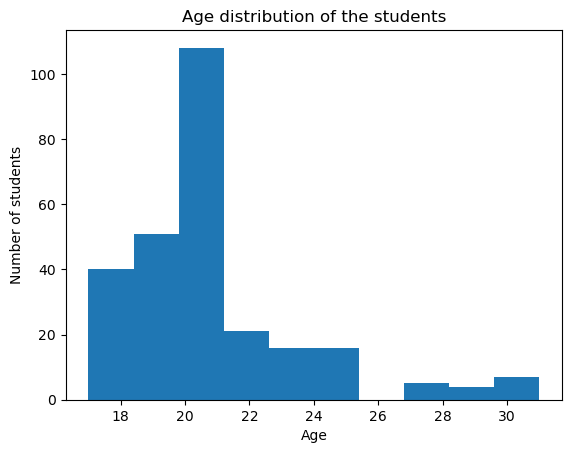

In [10]:
# Build a histogram of the Age column, with title and labels
plt.hist(students['Age'])
plt.title('Age distribution of the students')
plt.xlabel('Age')
plt.ylabel('Number of students')

The age of participants varied between 17 and 31 years old, with the average age being approximately 21 years. The age distribution is skewed towards the right, meaning that there are more participants on the older end of the age range. The majority of students fell within the 18-21 age bracket. This pattern can be attributed to the fact that a small percentage (7.84%) of the participants were graduate students, who tend to be older than the larger group (92.16%) of undergraduate students surveyed

Text(0, 0.5, 'Number of students')

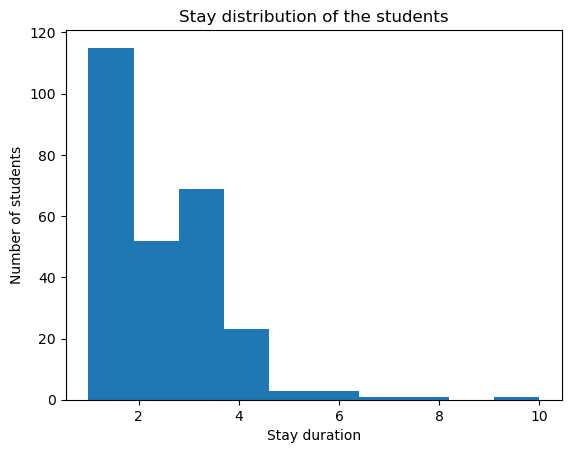

In [11]:
# Build a histogram on the Stay column, with title and labels
plt.hist(students['Stay'])
plt.title('Stay distribution of the students')
plt.xlabel('Stay duration')
plt.ylabel('Number of students')

Until the reported time, most participants had been in this university for 1 to 3 years.

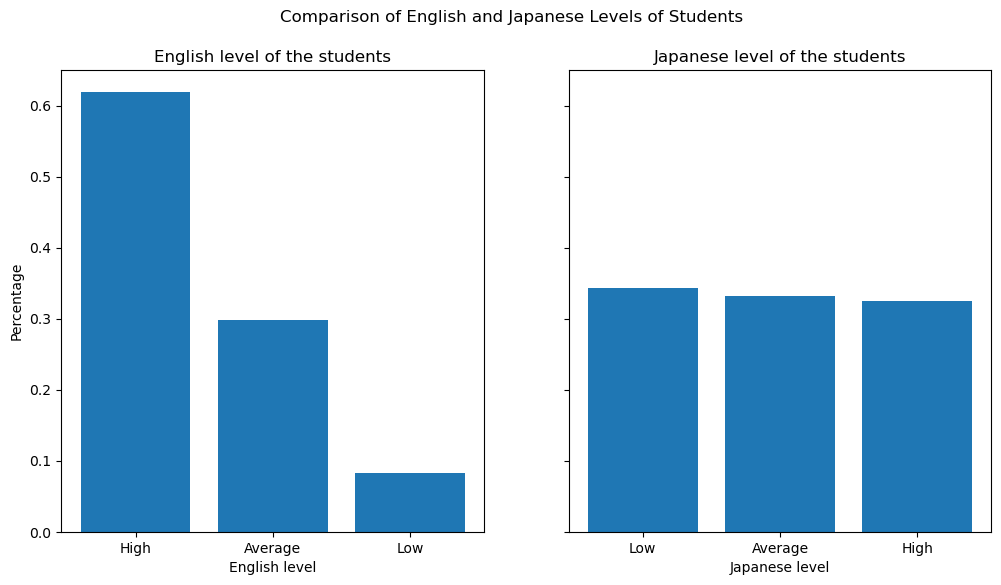

In [12]:
def create_percentages(data, category_column):
    percentages = data[category_column].value_counts(normalize=True).reset_index()
    percentages.columns = [category_column, 'percentage']
    return percentages

# Calculate percentages
english_percentages = create_percentages(students, 'English_cate')
japanese_percentages = create_percentages(students, 'Japanese_cate')

# Create a subplot figure
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

# Plot the English level bar chart
ax1.bar(english_percentages['English_cate'], english_percentages['percentage'])
ax1.set_title('English level of the students')
ax1.set_xlabel('English level')
ax1.set_ylabel('Percentage')

# Plot the Japanese level bar chart
ax2.bar(japanese_percentages['Japanese_cate'], japanese_percentages['percentage'])
ax2.set_title('Japanese level of the students')
ax2.set_xlabel('Japanese level')

# Update layout
fig.suptitle('Comparison of English and Japanese Levels of Students')

plt.show()

Regarding language proficiency, a majority (61.94%) rated themselves as highly proficient (4 or 5 on a 1-5 scale) in English language ability. Japanese language ability was more varied, with ratings spread equally across low to high proficiency levels.

#### Demographic Conclusion
1. Young adult learners with most participants being traditional undergraduate age.
2. Highly diverse international representation, mostly from South East Asia.
3. A noticeable gender imbalance, with female students outnumbering make students.
4. Regarding language proficiency based on self-evaluation, most participants rated themselves as highly proficient in English, while Japanese language proficiency levels were varied across the group.

### Mental Health Conditions

In [13]:
# Show all the fields in the dataset
students.columns

Index(['inter_dom', 'Region', 'Gender', 'Academic', 'Age', 'Age_cate', 'Stay',
       'Stay_Cate', 'Japanese', 'Japanese_cate', 'English', 'English_cate',
       'Intimate', 'Religion', 'Suicide', 'Dep', 'DepType', 'ToDep', 'DepSev',
       'ToSC', 'APD', 'AHome', 'APH', 'Afear', 'ACS', 'AGuilt', 'AMiscell',
       'ToAS', 'Partner', 'Friends', 'Parents', 'Relative', 'Profess',
       ' Phone', 'Doctor', 'Reli', 'Alone', 'Others', 'Internet', 'Partner_bi',
       'Friends_bi', 'Parents_bi', 'Relative_bi', 'Professional_bi',
       'Phone_bi', 'Doctor_bi', 'religion_bi', 'Alone_bi', 'Others_bi',
       'Internet_bi'],
      dtype='object')

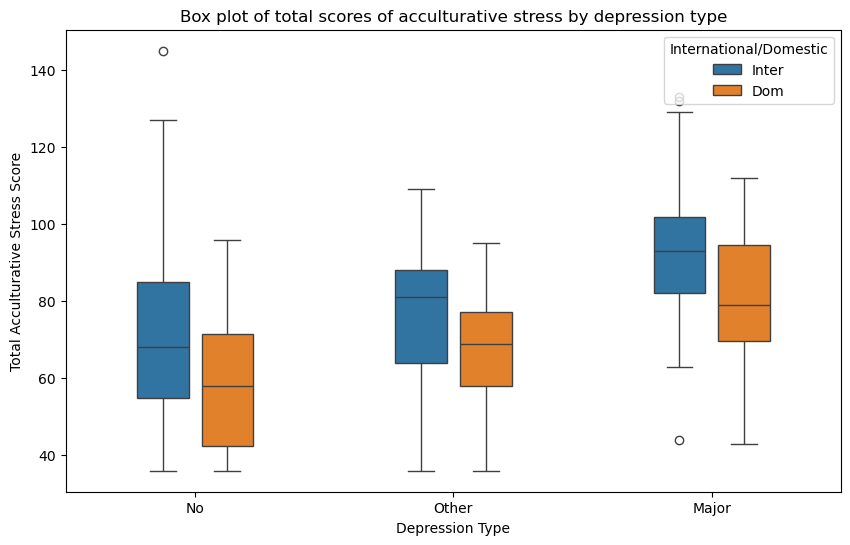

In [44]:
# Build a box plot of the ToAS score by DepType, colored by inter_dom
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=students, 
    x='DepType', 
    y='ToAS', 
    hue='inter_dom',
    width=0.5, # Width of the boxplot
    gap=0.2, # Distance between the boxplots
    order=['No', 'Other', 'Major'] 
)

# Set the title and labels
plt.title('Box plot of total scores of acculturative stress by depression type')
plt.xlabel('Depression Type')
plt.ylabel('Total Acculturative Stress Score')
plt.legend(title='International/Domestic', loc='upper right')

plt.show()

The data indicated that students who reported experiencing major depressive disorder tended to have higher scores for acculturative stress compared to those without depressive disorders or with other types of depressive disorders. It's worth noting that, across all cases, the acculturative stress scores were relatively more elevated for international students in comparison to domestic students.

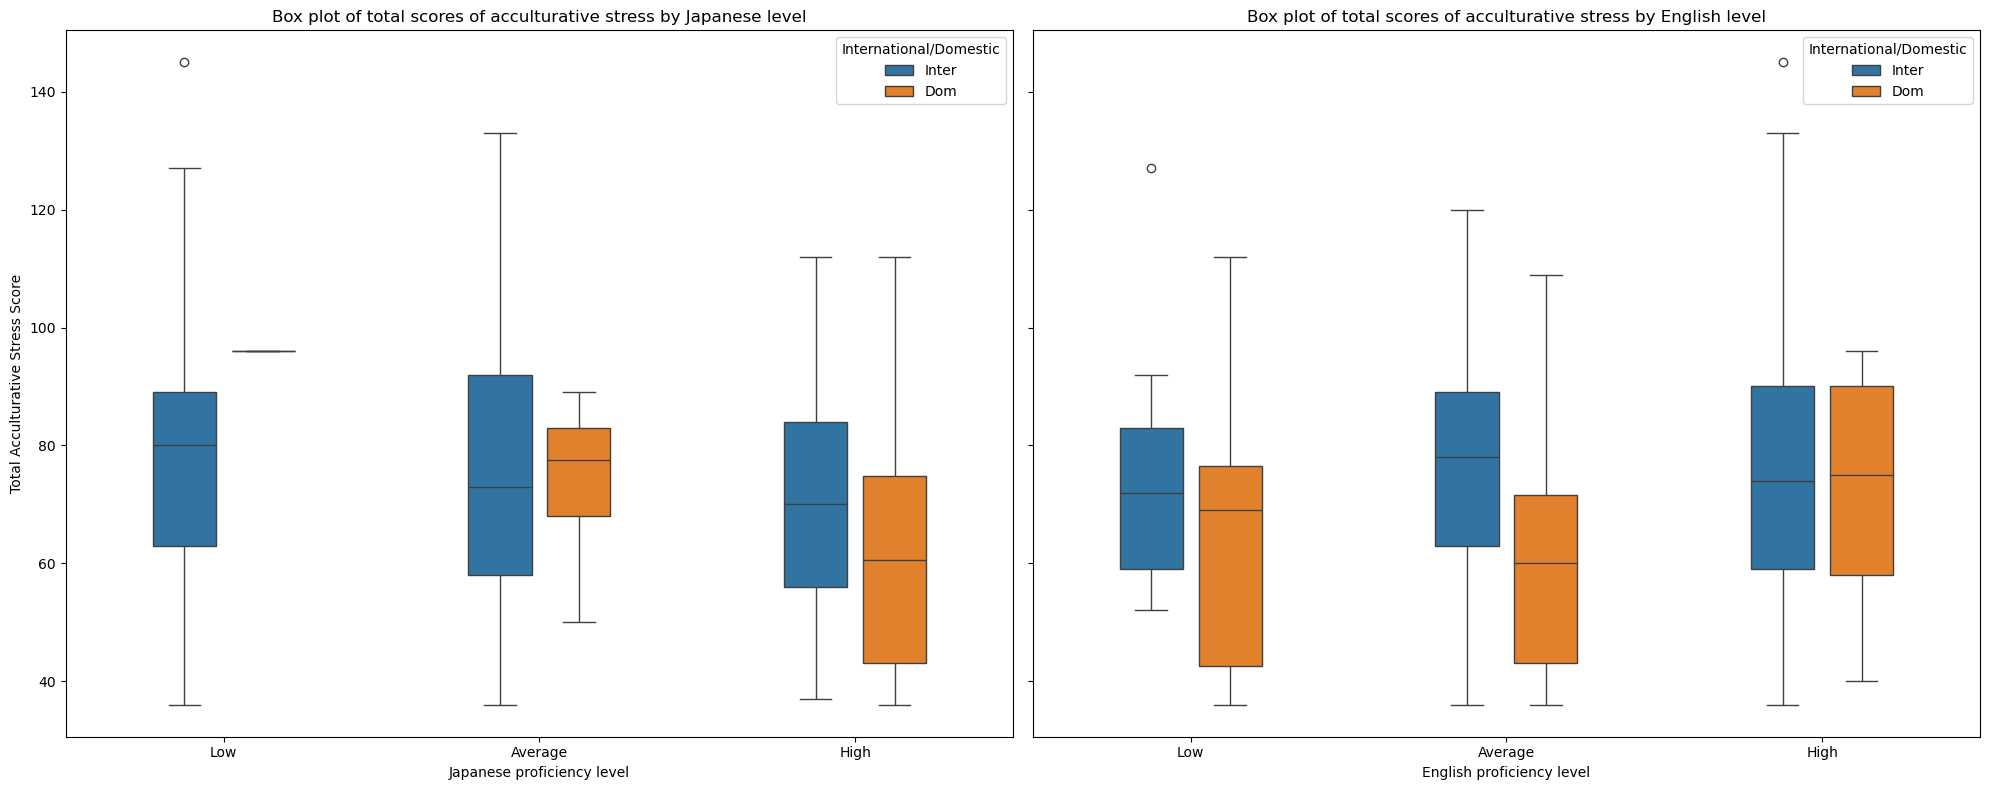

In [45]:
# Create the subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=True)

# Build the box plot of the ToAS score by Japanese level, colored by inter_dom
sns.boxplot(
    data=students, 
    x='Japanese_cate', 
    y='ToAS', 
    hue='inter_dom',
    ax=axs[0],
    width=0.5,
    gap=0.2,
    order=['Low', 'Average', 'High']
)

# Set the title and labels for the first plot
axs[0].set_title('Box plot of total scores of acculturative stress by Japanese level')
axs[0].set_xlabel('Japanese proficiency level')
axs[0].set_ylabel('Total Acculturative Stress Score')
axs[0].legend(title='International/Domestic', loc='upper right')

# Build the box plot of the ToAS score by English level, colored by inter_dom
sns.boxplot(
    data=students, 
    x='English_cate', 
    y='ToAS', 
    hue='inter_dom',
    ax=axs[1],
    width=0.5,
    gap=0.2,
    order=['Low', 'Average', 'High']
)

# Set the title and labels for the second plot
axs[1].set_title('Box plot of total scores of acculturative stress by English level')
axs[1].set_xlabel('English proficiency level')
axs[1].set_ylabel('Total Acculturative Stress Score')
axs[1].legend(title='International/Domestic', loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The results suggest that higher Japanese language proficiency may contribute to lower levels of acculturative stress among both international and domestic students. However, no clear correlation was observed between English proficiency and acculturative stress levels. It's worth noting that some domestic students self-rated their Japanese proficiency as low and average, which could be a factor in their experiences of acculturative stress.

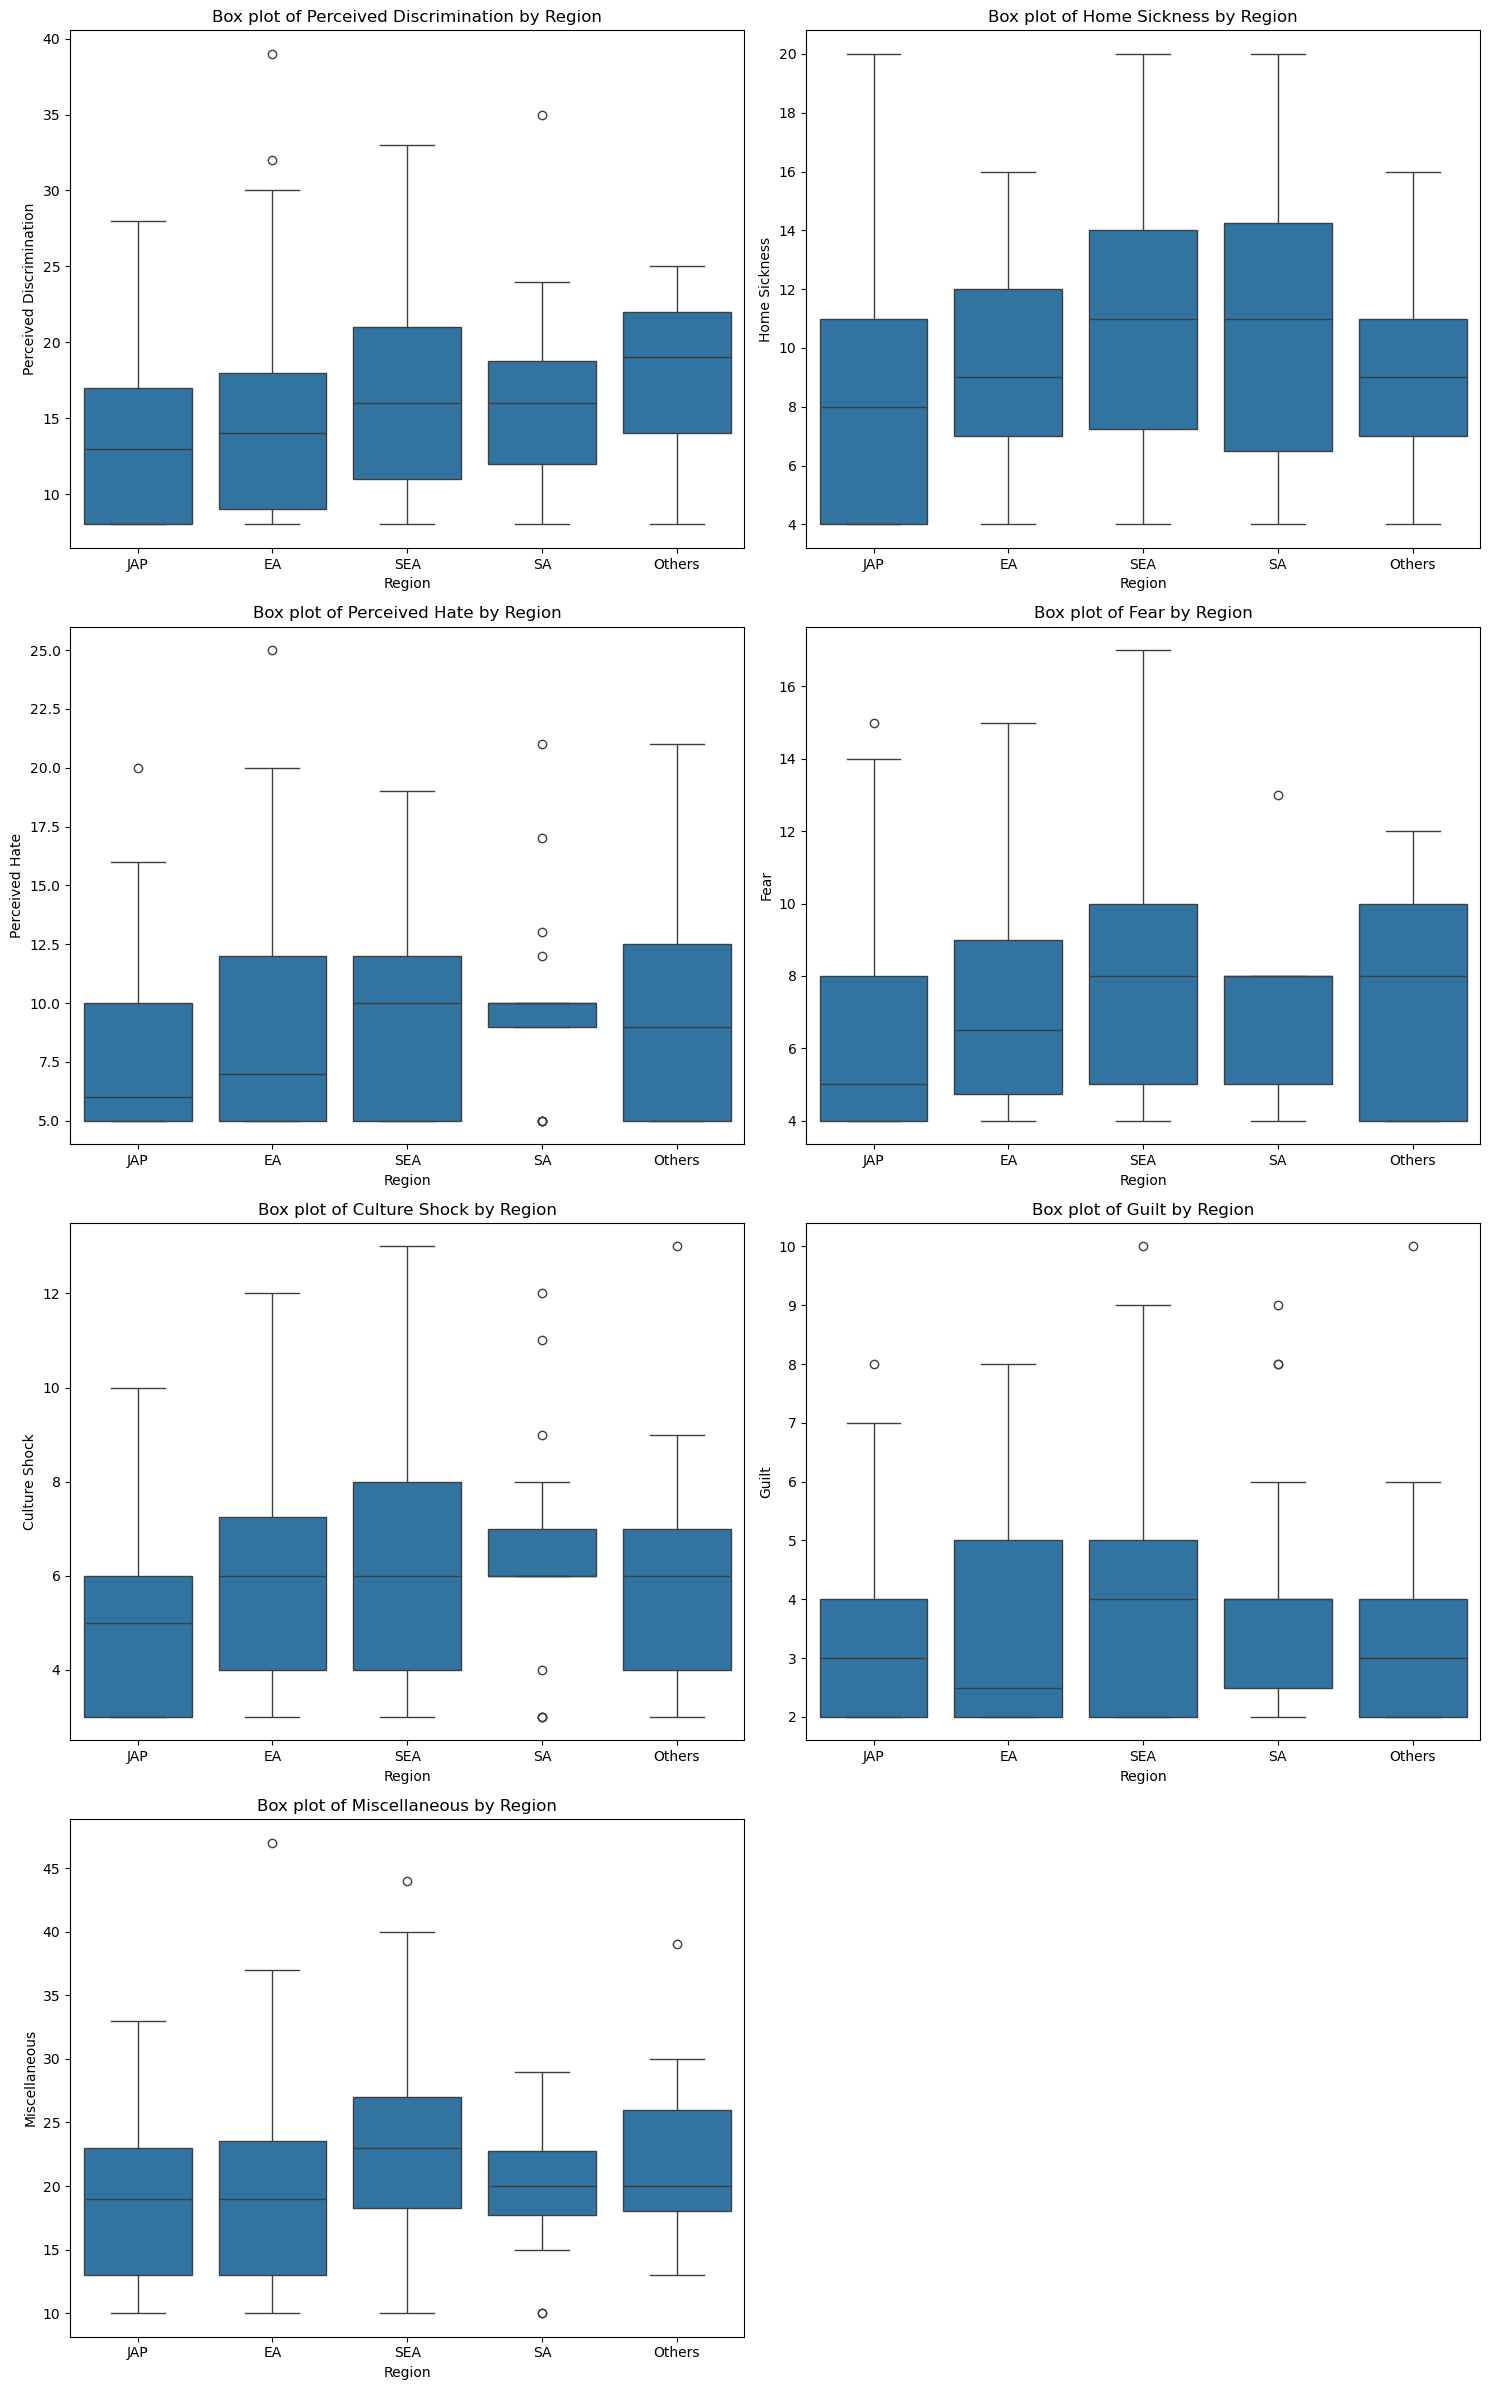

In [64]:
# List of variables contributing to the acculturative stress
as_variables = ['APD', 'AHome', 'APH', 'Afear', 'ACS', 'AGuilt', 'AMiscell']

# Define the specific order of regions
region_order = ['JAP', 'EA', 'SEA', 'SA', 'Others']

# Desired names for the variables
variable_names = {
    'APD': 'Perceived Discrimination',
    'AHome': 'Home Sickness',
    'APH': 'Perceived Hate',
    'Afear': 'Fear',
    'ACS': 'Culture Shock',
    'AGuilt': 'Guilt',
    'AMiscell': 'Miscellaneous'
}

# Number of plots per row
plots_per_row = 2

# Calculate the number of rows needed
num_rows = (len(as_variables) + plots_per_row - 1) // plots_per_row

# Create subplots
fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 6))

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Plot each variable in a box plot
for i, var in enumerate(as_variables):
    sns.boxplot(
        data=students, 
        x='Region', 
        y=var,
        order=region_order,
        ax=axs[i]
    )

    # Set the title and labels using the renamed variables
    axs[i].set_title(f'Box plot of {variable_names[var]} by Region')
    axs[i].set_xlabel('Region')
    axs[i].set_ylabel(variable_names[var])

# Remove any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Examining the box plots reveals differences in acculturative stress across various student groups.

Students from East Asian (EA) countries experienced slightly higher levels of acculturative stress compared to local students, but noticeably less than those from South East Asia (SEA) and South Asia (SA). This disparity may come from the cultural similarities and geographical distance between EA and Japan.

The data also highlights that SEA and SA students report markedly higher scores in homesickness, perceived hate, fear, and guilt - compared to their EA and Japanese counterparts.

Interestingly, despite the variations in other stress factors, all international student groups seem to experience the same levels of culture shock when studying in Japan. This uniform experience highlights the challenge of adapting to Japanese society, which is known for its homoheneity and the complexity of its social norms.

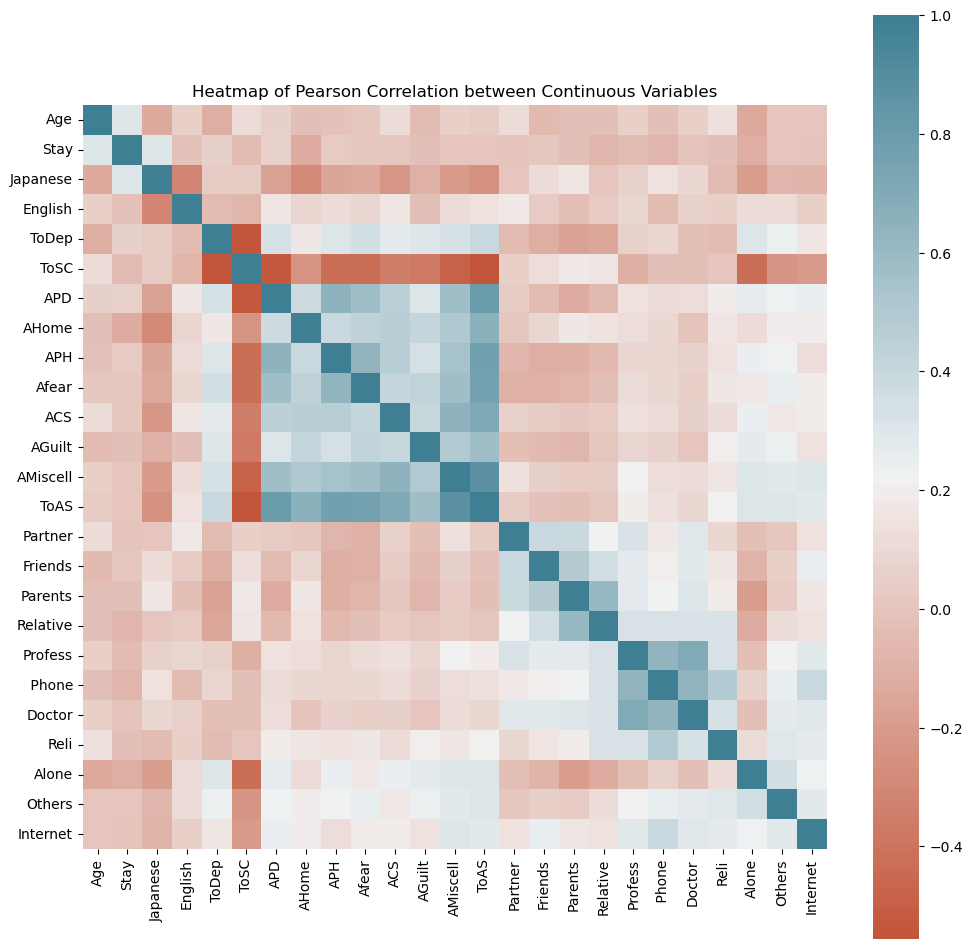

In [15]:
# List the columns that are continuous variables
continuous_variables = ['Age', 'Stay', 'Japanese', 'English', 'ToDep', 'ToSC', 'APD', 'AHome', 'APH', 'Afear', 'ACS', 'AGuilt', 'AMiscell', 'ToAS', 'Partner', 'Friends', 'Parents', 'Relative', 'Profess', ' Phone', 'Doctor', 'Reli', 'Alone', 'Others', 'Internet']

# Create a subset dataframe only the columns of the continous variables
data_cont = students[continuous_variables]

# Create a pearson correlation
data_corr = data_cont.corr(method='pearson')

# Build the Heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(
    data_corr,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# Set the title
plt.title('Heatmap of Pearson Correlation between Continuous Variables')

# Show the plot
plt.show()